# Image Augmentation
Image augmentation technology expands the scale of training datasets
by making a series of random changes to the training images to produce similar,
but different, training examples. Another way to explain image augmentation is
that randomly changing training examples can reduce a model's dependence on
certain properties, thereby improving its capability for generalization. For
example, we can crop the images in different ways, so that the objects of
interest appear in different positions, reducing the model's dependence on the
position where objects appear. We can also adjust the brightness, color, and
other factors to reduce model's sensitivity to color. It can be said that image
augmentation technology contributed greatly to the success of AlexNet. In this
section, we will discuss this technology, which is widely used in computer
vision.

First, import the packages or modules required for the experiment in this section.

In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import PIL
from PIL import Image

# Common Image Augmentation Method
We will apply the following transforms to an image using 'torchvision.transforms' :



*   Resize the image to (224, 224)
*   We can randomly change the hue and saturation of the image
*   We can also create a RandomColorJitter instance and set how to randomly change the brightness, contrast, saturation, and hue of the image at the same time. 
*   Horizontal Flip
*   Rotation









In [2]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.10, saturation=.55),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
])

In [3]:
img = Image.open("/content/apple.jpeg")

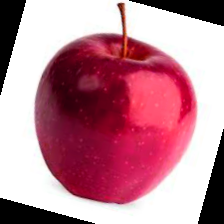

In [4]:
transforms(img)

# Using an Image Augmentation Training Model
Next, we will look at how to apply image augmentation in actual training. Here, we use the MNIST dataset to observe the model performance on dataset of augmented images.

In [5]:
transform_train = torchvision.transforms.Compose([
    torchvision.transforms.ColorJitter(hue=.10, saturation=.55),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(40, resample=PIL.Image.BILINEAR),
    torchvision.transforms.ToTensor()
])

transform_test = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

In order to obtain definitive results during prediction, we usually only apply image augmentation to the training example, and do not use image augmentation with random operations during prediction. Here, we use resize, color jitter, rotation and random horizontal flipping method. In addition, we use a `ToTensor` instance to convert minibatch images into the format required by PyTorch.

In [6]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

We can set the hyper parameters for the model.

In [7]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

We download the dataset and create DataLoaders for test set and train set.

In [8]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transform_train,
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transform_test)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [9]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

In [10]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.5863
Epoch [1/5], Step [200/600], Loss: 0.2191
Epoch [1/5], Step [300/600], Loss: 0.3434
Epoch [1/5], Step [400/600], Loss: 0.2428
Epoch [1/5], Step [500/600], Loss: 0.2102
Epoch [1/5], Step [600/600], Loss: 0.3019
Epoch [2/5], Step [100/600], Loss: 0.3036
Epoch [2/5], Step [200/600], Loss: 0.2419
Epoch [2/5], Step [300/600], Loss: 0.2189
Epoch [2/5], Step [400/600], Loss: 0.2131
Epoch [2/5], Step [500/600], Loss: 0.1447
Epoch [2/5], Step [600/600], Loss: 0.3064
Epoch [3/5], Step [100/600], Loss: 0.1166
Epoch [3/5], Step [200/600], Loss: 0.1930
Epoch [3/5], Step [300/600], Loss: 0.1506
Epoch [3/5], Step [400/600], Loss: 0.1399
Epoch [3/5], Step [500/600], Loss: 0.2541
Epoch [3/5], Step [600/600], Loss: 0.1431
Epoch [4/5], Step [100/600], Loss: 0.2039
Epoch [4/5], Step [200/600], Loss: 0.1451
Epoch [4/5], Step [300/600], Loss: 0.2032
Epoch [4/5], Step [400/600], Loss: 0.2130
Epoch [4/5], Step [500/600], Loss: 0.1343
Epoch [4/5], Step [600/600], Loss:

In [12]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 96.03 %


## Summary

* Image augmentation generates random images based on existing training data to cope with overfitting.
* In order to obtain definitive results during prediction, we usually only apply image augmentation to the training example, and do not use image augmentation with random operations during prediction.
* We can obtain classes related to image augmentation from PyTorch's `transforms` module.